# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import scipy.stats as stats
import pandas as pd

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodeMapping as nm
import normalize as norm

# Set Directory Paths

In [3]:
# Only used to load the FTDGeneralData_20221114.mat file --> Saved as NetworkDataGeneral
%store -r baseDir

# Directory path to load formatted Pathology Data
%store -r path_dataDir

# Directory path to save Calcualted Analysis Data
%store -r path_CalData

# Directory path to save Figures
%store -r path_Fig

# Loading

## Loading the preconstructed atlas data

In [4]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Loading Pathology Data (TAU, TDP) - Dropped

In [5]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

## Loading Dropped Index (=few observations)

In [6]:
# TAU_missing_index
with open(os.path.join(path_CalData, 'TAU_missing_index.pkl'), 'rb') as f:
    TAU_missing_index = pickle.load(f)
f.close()

# TDP_missing_index
with open(os.path.join(path_CalData, 'TDP_missing_index.pkl'), 'rb') as f:
    TDP_missing_index = pickle.load(f)
f.close()

## Loading Pathology Labels (TAU, TDP) - Dropped

In [7]:
# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

## Loading pathCoM (TAU, TDP) - Dropped

In [8]:
# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

# T-test between TAU vs TDP

## Checking if there is region differences between TAU and TDP due to Drop in Observations

In [9]:
print(TAU_missing_index)
print(TDP_missing_index)

# --> There is no difference

[ 7  8 17 19 27 28 37 39]
[ 7  8 17 19 27 28 37 39]


In [10]:
# Number of regions of Pathology (N = 40)
N = path_TAU_Drop.shape[1]

## T-test. Since the sample numbers are different between TAU and TDP, we would perform Welch's t-test

In [11]:
TAU_gt_TDP_Ttest_stat_list = []
TAU_gt_TDP_Ttest_pval_list = []

TDP_gt_TAU_Ttest_stat_list = []
TDP_gt_TAU_Ttest_pval_list = []


for i in range(N):
    TAU_data = path_TAU_Drop[:, i]
    TDP_data = path_TDP_Drop[:, i]

    # ignore NaN Values in T-test
    TAU_gt_TDP_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='greater', nan_policy='omit')
    TDP_gt_TAU_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='less', nan_policy='omit')

    TAU_gt_TDP_Ttest_stat = TAU_gt_TDP_Ttest[0]
    TAU_gt_TDP_Ttest_pval = TAU_gt_TDP_Ttest[1]

    TAU_gt_TDP_Ttest_stat_list.append(TAU_gt_TDP_Ttest_stat)
    TAU_gt_TDP_Ttest_pval_list.append(TAU_gt_TDP_Ttest_pval)

    TDP_gt_TAU_Ttest_stat = TDP_gt_TAU_Ttest[0]
    TDP_gt_TAU_Ttest_pval = TDP_gt_TAU_Ttest[1]

    TDP_gt_TAU_Ttest_stat_list.append(TDP_gt_TAU_Ttest_stat)
    TDP_gt_TAU_Ttest_pval_list.append(TDP_gt_TAU_Ttest_pval)
    

## TAU > TDP

In [12]:
# Pandas DataFrame
TAU_gt_TDP_df = pd.DataFrame(np.concatenate((np.array(TAU_gt_TDP_Ttest_pval_list).reshape((-1, 1)), np.array(TAU_gt_TDP_Ttest_stat_list).reshape((-1, 1))), axis=1), 
                             columns=['pval', 'stat'], index=pathNames_TAU_Drop)

In [13]:
TAU_gt_TDP_df

,pval,stat
ANG_L,1.340571e-09,6.868188
ATC_L,6.437222e-04,4.476553
HIP_L,3.223093e-06,5.427961
IFC_L,2.747253e-05,6.298169
M1_L,6.302006e-09,6.550771
MFC_L,8.790202e-16,9.748535
OFC_L,1.259114e-07,5.704105
SMTC_L,3.010218e-10,7.120638
SPC_L,7.779764e-08,7.064111
V1_L,1.567309e-07,5.603607


## TDP > TAU

In [14]:
# Pandas DataFrame
TDP_gt_TAU_df = pd.DataFrame(np.concatenate((np.array(TDP_gt_TAU_Ttest_pval_list).reshape((-1, 1)), np.array(TDP_gt_TAU_Ttest_stat_list).reshape((-1, 1))), axis=1), 
                             columns=['pval', 'stat'], index=pathNames_TDP_Drop)

In [15]:
TDP_gt_TAU_df

,pval,stat
ANG_L,1.000000,6.868188
ATC_L,0.999356,4.476553
HIP_L,0.999997,5.427961
IFC_L,0.999973,6.298169
M1_L,1.000000,6.550771
MFC_L,1.000000,9.748535
OFC_L,1.000000,5.704105
SMTC_L,1.000000,7.120638
SPC_L,1.000000,7.064111
V1_L,1.000000,5.603607


## Normalize the values between TAU and TDP

In [16]:
# Max, Min value of TAU
print(np.nanmax(path_TAU_Drop))
print(np.nanmin(path_TAU_Drop))

4.360727024958423
-6.292569639891903


In [17]:
# Max, Min value of TDP
print(np.nanmax(path_TDP_Drop))
print(np.nanmin(path_TDP_Drop))

0.2570987841537611
-8.804875263868018


In [18]:
# Min/Max Range of Normalizing
tmin = -1
tmax = 1

In [19]:
# normalizing TAU EXCLUDING NaN!
path_TAU_Drop_Norm = np.zeros((path_TAU_Drop.shape))

for i in range(path_TAU_Drop.shape[1]):
    path_TAU_Drop_Norm[:,i] = norm.normalize(path_TAU_Drop[:, i], tmin, tmax)

In [20]:
# normalizing TDP EXCLUDING NaN!
path_TDP_Drop_Norm = np.zeros((path_TDP_Drop.shape))

for i in range(path_TDP_Drop.shape[1]):
    path_TDP_Drop_Norm[:,i] = norm.normalize(path_TDP_Drop[:, i], tmin, tmax)

## T-test. Since the sample numbers are different between TAU and TDP, we would perform Welch's t-test

In [21]:
TAU_gt_TDP_Ttest_stat_list_Norm = []
TAU_gt_TDP_Ttest_pval_list_Norm = []

TDP_gt_TAU_Ttest_stat_list_Norm = []
TDP_gt_TAU_Ttest_pval_list_Norm = []


for i in range(N):
    TAU_data = path_TAU_Drop_Norm[:, i]
    TDP_data = path_TDP_Drop_Norm[:, i]

    # ignore NaN Values in T-test
    TAU_gt_TDP_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='greater', nan_policy='omit')
    TDP_gt_TAU_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='less', nan_policy='omit')

    TAU_gt_TDP_Ttest_stat = TAU_gt_TDP_Ttest[0]
    TAU_gt_TDP_Ttest_pval = TAU_gt_TDP_Ttest[1]

    TAU_gt_TDP_Ttest_stat_list_Norm.append(TAU_gt_TDP_Ttest_stat)
    TAU_gt_TDP_Ttest_pval_list_Norm.append(TAU_gt_TDP_Ttest_pval)

    TDP_gt_TAU_Ttest_stat = TDP_gt_TAU_Ttest[0]
    TDP_gt_TAU_Ttest_pval = TDP_gt_TAU_Ttest[1]

    TDP_gt_TAU_Ttest_stat_list_Norm.append(TDP_gt_TAU_Ttest_stat)
    TDP_gt_TAU_Ttest_pval_list_Norm.append(TDP_gt_TAU_Ttest_pval)
    

## TAU > TDP

In [22]:
# Pandas DataFrame
TAU_gt_TDP_Norm_df = pd.DataFrame(np.concatenate((np.array(TAU_gt_TDP_Ttest_pval_list_Norm).reshape((-1, 1)), np.array(TAU_gt_TDP_Ttest_stat_list_Norm).reshape((-1, 1))), 
                                                 axis=1), columns=['pval', 'stat'], index=pathNames_TAU_Drop)

In [23]:
TAU_gt_TDP_Norm_df

,pval,stat
ANG_L,0.353921,0.376205
ATC_L,0.295724,0.559762
HIP_L,0.886535,-1.233480
IFC_L,0.615913,-0.303176
M1_L,0.951206,-1.680153
MFC_L,0.955593,-1.720564
OFC_L,0.997057,-2.839758
SMTC_L,0.361521,0.355667
SPC_L,0.032836,1.915341
V1_L,0.280392,0.584503


## TDP > TAU

In [24]:
# Pandas DataFrame
TDP_gt_TAU_Norm_df = pd.DataFrame(np.concatenate((np.array(TDP_gt_TAU_Ttest_pval_list_Norm).reshape((-1, 1)), np.array(TDP_gt_TAU_Ttest_stat_list_Norm).reshape((-1, 1))), 
                                                 axis=1), columns=['pval', 'stat'], index=pathNames_TDP_Drop)

In [25]:
TDP_gt_TAU_Norm_df

,pval,stat
ANG_L,0.646079,0.376205
ATC_L,0.704276,0.559762
HIP_L,0.113465,-1.233480
IFC_L,0.384087,-0.303176
M1_L,0.048794,-1.680153
MFC_L,0.044407,-1.720564
OFC_L,0.002943,-2.839758
SMTC_L,0.638479,0.355667
SPC_L,0.967164,1.915341
V1_L,0.719608,0.584503


# Save T-test results as csv

In [26]:
# Original
TAU_gt_TDP_df.to_csv(path_Fig + '/TAU_gt_TDP_Ttest.csv', index=True)

TDP_gt_TAU_df.to_csv(path_Fig + '/TDP_gt_TAU_Ttest.csv', index=True)

# Normalized
TAU_gt_TDP_Norm_df.to_csv(path_Fig + '/TAU_gt_TDP_Ttest(Normalized).csv', index=True)

TDP_gt_TAU_Norm_df.to_csv(path_Fig + '/TDP_gt_TAU_Ttest(Normalized).csv', index=True)

# 3D Nodes Mapping of Log %AO

### Define Vectors for Node Size and Node Color

In [27]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = path_TAU_Drop.copy()
path_TDP_exp = path_TDP_Drop.copy()

# Get min/max %AO TAU/TDP
minPath_TAU = np.nanmin(path_TAU_exp, axis=0)
maxPath_TAU = np.nanmax(path_TAU_exp - minPath_TAU + 0.0015, axis=0)

minPath_TDP = np.nanmin(path_TDP_exp, axis=0)
maxPath_TDP = np.nanmax(path_TDP_exp - minPath_TDP + 0.0015, axis=0)

#### Currently not doing Normalization ####
# # Size of Nodes --> Marker
# markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
# markerVecTAU = 3 * ((markerVecTAU - minPath_TAU) / maxPath_TAU)

# markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
# markerVecTDP = 3 * ((markerVecTDP - minPath_TDP) / maxPath_TDP)

markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = markerVecTAU + np.absolute(np.min(np.nanmean(path_TAU_exp, axis=0))) + 0.015

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = markerVecTDP + np.absolute(np.min(np.nanmean(path_TDP_exp, axis=0))) + 0.015

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

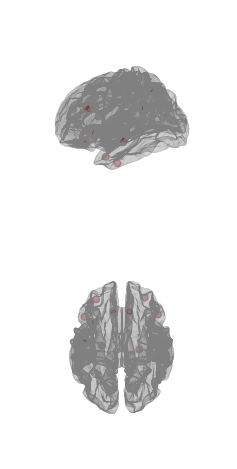

In [28]:
nm.nodeMapping(NetworkDataGeneral, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, colorVecTAU, path_Fig, 'Node_3D_Mapping_TAU',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

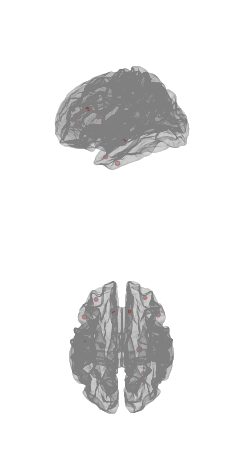

In [29]:
nm.nodeMapping(NetworkDataGeneral, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, colorVecTDP, path_Fig, 'Node_3D_Mapping_TDP',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

# For Normalized One

In [30]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = path_TAU_Drop_Norm.copy()
path_TDP_exp = path_TDP_Drop_Norm.copy()

# Get min/max %AO TAU/TDP
minPath_TAU = np.nanmin(path_TAU_exp, axis=0)
maxPath_TAU = np.nanmax(path_TAU_exp - minPath_TAU + 0.0015, axis=0)

minPath_TDP = np.nanmin(path_TDP_exp, axis=0)
maxPath_TDP = np.nanmax(path_TDP_exp - minPath_TDP + 0.0015, axis=0)

#### Currently not doing Normalization ####
# # Size of Nodes --> Marker
# markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
# markerVecTAU = 3 * ((markerVecTAU - minPath_TAU) / maxPath_TAU)

# markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
# markerVecTDP = 3 * ((markerVecTDP - minPath_TDP) / maxPath_TDP)

markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = markerVecTAU + np.absolute(np.min(np.nanmean(path_TAU_exp, axis=0))) + 0.015

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = markerVecTDP + np.absolute(np.min(np.nanmean(path_TDP_exp, axis=0))) + 0.015


# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

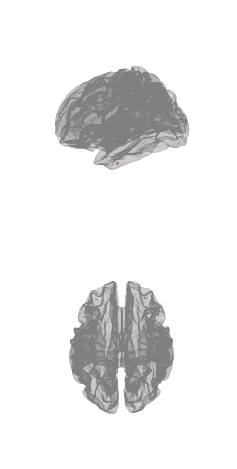

In [31]:
nm.nodeMapping(NetworkDataGeneral, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, colorVecTAU, path_Fig, 'Node_3D_Mapping_TAU(Normalized)',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

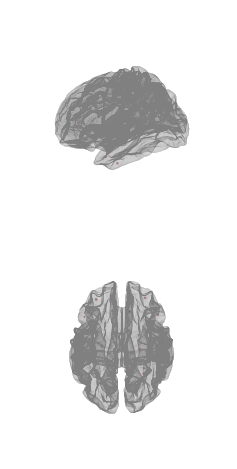

In [32]:
nm.nodeMapping(NetworkDataGeneral, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, colorVecTDP, path_Fig, 'Node_3D_Mapping_TDP(Normalized)',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)